In [78]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow.keras.applications.resnet

In [79]:
directory = '/content/drive/MyDrive/Rice disease archive'

In [80]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['blast', 'tungro', 'blight']
3


In [81]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [82]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<60:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [83]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [84]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [85]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [86]:
print(len(labels))
print(len(tlabels))

180
60


In [87]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [88]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(144, 100, 100, 3)
(36, 100, 100, 3)
(144, 3)
(36, 3)


In [89]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [90]:
pretrained_model3 = tf.keras.applications.ResNet50V2(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

94683136/94668760 [==============================] - 1s 0us/step


In [91]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(3, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [92]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [93]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=40)

Epoch 1/40
5/5 [==============================] - 5s 402ms/step - loss: 1.4206 - accuracy: 0.4514 - val_loss: 1.2503 - val_accuracy: 0.4722
Epoch 2/40
5/5 [==============================] - 1s 149ms/step - loss: 0.8420 - accuracy: 0.6389 - val_loss: 1.3372 - val_accuracy: 0.3333
Epoch 3/40
5/5 [==============================] - 1s 140ms/step - loss: 0.8039 - accuracy: 0.6111 - val_loss: 1.3496 - val_accuracy: 0.4722
Epoch 4/40
5/5 [==============================] - 1s 133ms/step - loss: 0.6372 - accuracy: 0.7361 - val_loss: 1.2427 - val_accuracy: 0.4722
Epoch 5/40
5/5 [==============================] - 1s 150ms/step - loss: 0.6317 - accuracy: 0.7222 - val_loss: 1.2294 - val_accuracy: 0.4722
Epoch 6/40
5/5 [==============================] - 1s 131ms/step - loss: 0.5725 - accuracy: 0.7569 - val_loss: 1.2033 - val_accuracy: 0.4722
Epoch 7/40
5/5 [==============================] - 1s 149ms/step - loss: 0.6144 - accuracy: 0.7222 - val_loss: 1.1997 - val_accuracy: 0.4722
Epoch 8/40
5/5 [====

In [94]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.57      0.87      0.68        15
           1       0.60      0.23      0.33        13
           2       1.00      1.00      1.00         8

    accuracy                           0.67        36
   macro avg       0.72      0.70      0.67        36
weighted avg       0.67      0.67      0.63        36



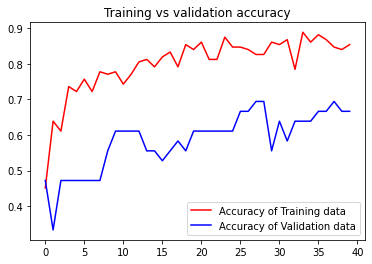

<Figure size 432x288 with 0 Axes>

In [95]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

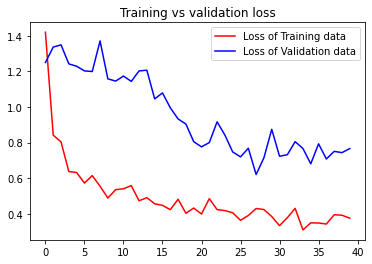

<Figure size 432x288 with 0 Axes>

In [96]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

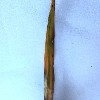

In [97]:
load_img("/content/drive/MyDrive/Rice disease archive/tungro/IMG_1028.jpg",target_size=(100,100))

In [98]:
image=load_img("/content/drive/MyDrive/Rice disease archive/tungro/IMG_1028.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [99]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

Prediction is tungro.


In [100]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(60, 100, 100, 3)
(60, 3)


In [101]:
ANS=tlabels0

In [102]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.7833333333333333
